<a href="https://colab.research.google.com/github/abdyraman/salaries_var_mvsw/blob/main/women_job_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import hvplot.pandas
import numpy as np

In [ ]:
# Replace the file path with the correct location of the Excel file on your system
file_path = "women_gender_occupation_copy.xlsx"
# Read the Excel file into a Pandas DataFrame
df_women_raw = pd.read_excel(file_path)
df_women_raw

,Employment of the population by gender and occupation groups,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Kyrgyz Republic,846.7,850.5,881.2,881.7,901.0,927.3,924.2,926.0,938.9,935.4,900.8,938.6,949.2,935.3,899.6,910.8,937.4,949.8
1,Managers,4.3,6.2,11.9,17.3,16.5,14.1,12.0,11.4,9.9,10.6,7.0,7.3,7.6,9.5,15.3,14.5,22.1,25.3
2,High-level professionals,179.5,196.0,206.0,197.2,204.9,203.0,202.0,206.3,212.7,210.4,205.3,207.7,225.0,242.6,204.2,223.4,221.5,287.8
3,Mid-level professionals,79.5,79.0,88.3,86.7,89.0,89.3,97.0,100.0,102.2,109.2,102.5,115.9,117.6,115.3,124.2,117.9,106.7,67.6
4,Employees engaged in preparation of informatio...,35.0,36.8,36.4,34.1,34.8,33.6,30.1,29.2,28.9,24.3,20.2,22.5,23.6,26.4,30.1,31.9,32.7,30.3
5,"Employees of the service sector, housing and u...",158.6,174.2,177.8,195.1,196.7,209.3,213.9,223.2,221.1,225.5,201.6,191.2,204.5,196.8,179.7,187.1,230.2,244.2
6,"Skilled workers in agriculture, forestry, hunt...",329.0,303.2,314.9,293.1,288.1,303.0,273.6,256.2,264.7,263.6,250.1,261.2,243.3,257.3,113.7,108.0,193.7,175.9
7,Skilled workers of large and small industrial ...,50.4,55.6,56.7,59.6,65.4,69.2,70.8,70.8,68.5,71.5,71.9,79.7,75.9,79.3,69.4,80.6,87.7,90.8
8,"Machine, device and engine operators, locksmit...",8.0,8.0,6.6,4.4,4.1,4.8,5.0,4.0,4.1,7.7,41.4,52.8,48.6,8.1,18.8,12.2,9.9,5.2
9,Unskilled workers,77.6,73.9,67.6,68.9,79.0,77.1,92.3,101.9,108.1,93.7,79.3,80.4,85.5,85.6,213.4,209.1,111.3,122.8


In [ ]:
# Set the index of the DataFrame using the specified column
df_women_raw.index = df_women_raw['Employment of the population by gender and occupation groups']
# Create a new DataFrame by dropping the specified column
df_women_indexed = df_women_raw.drop(columns=['Employment of the population by gender and occupation groups'])
df_women_indexed

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Employment of the population by gender and occupation groups,,,,,,,,,,,,,,,,,,
Kyrgyz Republic,846.7,850.5,881.2,881.7,901.0,927.3,924.2,926.0,938.9,935.4,900.8,938.6,949.2,935.3,899.6,910.8,937.4,949.8
Managers,4.3,6.2,11.9,17.3,16.5,14.1,12.0,11.4,9.9,10.6,7.0,7.3,7.6,9.5,15.3,14.5,22.1,25.3
High-level professionals,179.5,196.0,206.0,197.2,204.9,203.0,202.0,206.3,212.7,210.4,205.3,207.7,225.0,242.6,204.2,223.4,221.5,287.8
Mid-level professionals,79.5,79.0,88.3,86.7,89.0,89.3,97.0,100.0,102.2,109.2,102.5,115.9,117.6,115.3,124.2,117.9,106.7,67.6
"Employees engaged in preparation of information, documentation, accounting, financial and information services",35.0,36.8,36.4,34.1,34.8,33.6,30.1,29.2,28.9,24.3,20.2,22.5,23.6,26.4,30.1,31.9,32.7,30.3
"Employees of the service sector, housing and utilities, trade and related activities",158.6,174.2,177.8,195.1,196.7,209.3,213.9,223.2,221.1,225.5,201.6,191.2,204.5,196.8,179.7,187.1,230.2,244.2
"Skilled workers in agriculture, forestry, hunting, fishing and fisheries",329.0,303.2,314.9,293.1,288.1,303.0,273.6,256.2,264.7,263.6,250.1,261.2,243.3,257.3,113.7,108.0,193.7,175.9
"Skilled workers of large and small industrial enterprises, arts and crafts, construction, transport, communications, geology and mineral exploration enterprises",50.4,55.6,56.7,59.6,65.4,69.2,70.8,70.8,68.5,71.5,71.9,79.7,75.9,79.3,69.4,80.6,87.7,90.8
"Machine, device and engine operators, locksmiths and assemblers",8.0,8.0,6.6,4.4,4.1,4.8,5.0,4.0,4.1,7.7,41.4,52.8,48.6,8.1,18.8,12.2,9.9,5.2


In [ ]:
# Create a DataFrame with the scaled data
scaler = StandardScaler()
# Extract the columns you want to scale
columns_to_scale = df_women_indexed[[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]]
scaled_data = scaler.fit_transform(columns_to_scale)


In [ ]:
# Create a DataFrame with the scaled data
df_women_scaled = pd.DataFrame(
    scaled_data,
    columns=[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020]
)
# Copy the occupation group names from the original data
df_women_scaled["Job_areas"] = df_women_indexed.index
# Set the "Job areas" column as the index
df_women_scaled = df_women_scaled.set_index("Job_areas")
# Drop the row at index label 0
df_women_scaled = df_women_scaled.drop(df_women_scaled.index[0])
df_women_scaled

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Job_areas,,,,,,,,,,,,,,,,,,
Managers,-0.712893,-0.713396,-0.691069,-0.668887,-0.676572,-0.684305,-0.695442,-0.701309,-0.708286,-0.705198,-0.722631,-0.725060,-0.725071,-0.711822,-0.692065,-0.696125,-0.669251,-0.657788
High-level professionals,0.010907,0.073188,0.085004,0.053789,0.066888,0.037968,0.038269,0.051777,0.063933,0.058107,0.069025,0.046059,0.102472,0.179676,0.070038,0.134612,0.101149,0.330758
Mid-level professionals,-0.402221,-0.411692,-0.385597,-0.390100,-0.390474,-0.396772,-0.367203,-0.358962,-0.356828,-0.328512,-0.341375,-0.307178,-0.306351,-0.307186,-0.252716,-0.284932,-0.342391,-0.498491
"Employees engaged in preparation of information, documentation, accounting, financial and information services",-0.586063,-0.586581,-0.593110,-0.601400,-0.604357,-0.609745,-0.625547,-0.632531,-0.635939,-0.652859,-0.669934,-0.666572,-0.664166,-0.647187,-0.632355,-0.626930,-0.628297,-0.638959
"Employees of the service sector, housing and utilities, trade and related activities",-0.075437,-0.017157,-0.027748,0.045353,0.034529,0.062057,0.084222,0.117078,0.095918,0.115795,0.054254,-0.017431,0.024438,0.004513,-0.028806,-0.009743,0.134762,0.166565
"Skilled workers in agriculture, forestry, hunting, fishing and fisheries",0.628532,0.517454,0.520421,0.439029,0.395210,0.420325,0.314762,0.244589,0.261938,0.261350,0.247877,0.251922,0.172132,0.235897,-0.295078,-0.324302,-0.006259,-0.090645
"Skilled workers of large and small industrial enterprises, arts and crafts, construction, transport, communications, geology and mineral exploration enterprises",-0.522441,-0.508668,-0.511944,-0.498964,-0.483604,-0.473626,-0.468378,-0.471790,-0.485150,-0.472539,-0.463536,-0.446472,-0.465084,-0.444869,-0.473802,-0.433264,-0.415799,-0.411122
"Machine, device and engine operators, locksmiths and assemblers",-0.697607,-0.705936,-0.712260,-0.720708,-0.725505,-0.719864,-0.722474,-0.729903,-0.730372,-0.716277,-0.585299,-0.549980,-0.569002,-0.717176,-0.677944,-0.705271,-0.716386,-0.733482
Unskilled workers,-0.410070,-0.432828,-0.468362,-0.461605,-0.429936,-0.443420,-0.385353,-0.351621,-0.334362,-0.387727,-0.433994,-0.443778,-0.428541,-0.420775,0.107154,0.077745,-0.324619,-0.290614


In [ ]:
df_women_transposed = df_women_scaled.transpose()
df_women_transposed

Job_areas,Managers,High-level professionals,Mid-level professionals,"Employees engaged in preparation of information, documentation, accounting, financial and information services","Employees of the service sector, housing and utilities, trade and related activities","Skilled workers in agriculture, forestry, hunting, fishing and fisheries","Skilled workers of large and small industrial enterprises, arts and crafts, construction, transport, communications, geology and mineral exploration enterprises","Machine, device and engine operators, locksmiths and assemblers",Unskilled workers
2003,-0.712893,0.010907,-0.402221,-0.586063,-0.075437,0.628532,-0.522441,-0.697607,-0.410070
2004,-0.713396,0.073188,-0.411692,-0.586581,-0.017157,0.517454,-0.508668,-0.705936,-0.432828
2005,-0.691069,0.085004,-0.385597,-0.593110,-0.027748,0.520421,-0.511944,-0.712260,-0.468362
2006,-0.668887,0.053789,-0.390100,-0.601400,0.045353,0.439029,-0.498964,-0.720708,-0.461605
2007,-0.676572,0.066888,-0.390474,-0.604357,0.034529,0.395210,-0.483604,-0.725505,-0.429936
2008,-0.684305,0.037968,-0.396772,-0.609745,0.062057,0.420325,-0.473626,-0.719864,-0.443420
2009,-0.695442,0.038269,-0.367203,-0.625547,0.084222,0.314762,-0.468378,-0.722474,-0.385353
2010,-0.701309,0.051777,-0.358962,-0.632531,0.117078,0.244589,-0.471790,-0.729903,-0.351621
2011,-0.708286,0.063933,-0.356828,-0.635939,0.095918,0.261938,-0.485150,-0.730372,-0.334362
2012,-0.705198,0.058107,-0.328512,-0.652859,0.115795,0.261350,-0.472539,-0.716277,-0.387727


Part 2. Use the Elbow Method to determine the optimal number of clusters for KMeans.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [ ]:
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 10))

In [ ]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_women_scaled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,20.018015
1,2,4.234057
2,3,1.969841
3,4,0.648217
4,5,0.335938


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

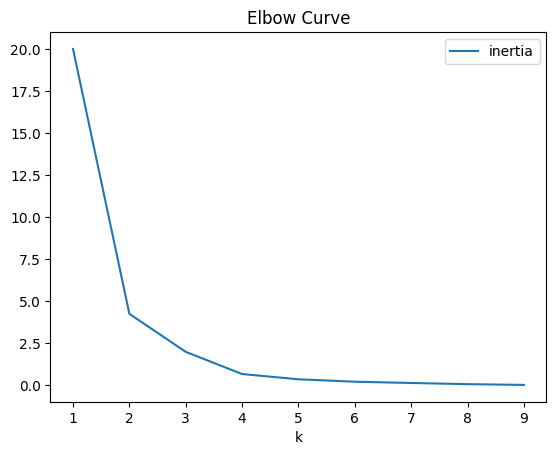

In [ ]:
# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

Part 3: Segment the data with K-means using the optimal number of clusters

In [ ]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=2, random_state=0)
# Fit the model
model.fit(df_women_scaled)
# Make predictions
kmeans_predictions = model.predict(df_women_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

kmeans_predictions[-10:]

array([1, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int32)

Part 4. Cluster the data using AgglomerativeClustering and Birch

In [ ]:
agglo_model = AgglomerativeClustering(n_clusters=2)
agglo_predictions = agglo_model.fit_predict(df_women_scaled)

In [ ]:
agglo_predictions[-10:]

array([0, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
birch_model = Birch(n_clusters=5)
birch_model.fit(df_women_scaled)
birch_predictions = birch_model.predict(df_women_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (4) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(


In [ ]:
# Previewing the predicted customer classifcations for Birch
birch_predictions[-10:]

array([0, 1, 2, 0, 1, 3, 2, 0, 2])


Part 5. Compare the cluster results from using Kmeans, AgglomerativeClustering, Birch

In [ ]:
# Create a copy of the customers_df DataFrame
women_predictions_df = df_women_scaled.copy()
# Add class columns with the labels to the new DataFrame
women_predictions_df["kmeans-segments"] = kmeans_predictions
women_predictions_df["agglomerative-segments"] = agglo_predictions
women_predictions_df["birch-segments"] = birch_predictions
women_predictions_df

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,kmeans-segments,agglomerative-segments,birch-segments
Job_areas,,,,,,,,,,,,,,,,,,,,,
Managers,-0.712893,-0.713396,-0.691069,-0.668887,-0.676572,-0.684305,-0.695442,-0.701309,-0.708286,-0.705198,...,-0.725060,-0.725071,-0.711822,-0.692065,-0.696125,-0.669251,-0.657788,1,0,0
High-level professionals,0.010907,0.073188,0.085004,0.053789,0.066888,0.037968,0.038269,0.051777,0.063933,0.058107,...,0.046059,0.102472,0.179676,0.070038,0.134612,0.101149,0.330758,0,1,1
Mid-level professionals,-0.402221,-0.411692,-0.385597,-0.390100,-0.390474,-0.396772,-0.367203,-0.358962,-0.356828,-0.328512,...,-0.307178,-0.306351,-0.307186,-0.252716,-0.284932,-0.342391,-0.498491,1,0,2
"Employees engaged in preparation of information, documentation, accounting, financial and information services",-0.586063,-0.586581,-0.593110,-0.601400,-0.604357,-0.609745,-0.625547,-0.632531,-0.635939,-0.652859,...,-0.666572,-0.664166,-0.647187,-0.632355,-0.626930,-0.628297,-0.638959,1,0,0
"Employees of the service sector, housing and utilities, trade and related activities",-0.075437,-0.017157,-0.027748,0.045353,0.034529,0.062057,0.084222,0.117078,0.095918,0.115795,...,-0.017431,0.024438,0.004513,-0.028806,-0.009743,0.134762,0.166565,0,1,1
"Skilled workers in agriculture, forestry, hunting, fishing and fisheries",0.628532,0.517454,0.520421,0.439029,0.395210,0.420325,0.314762,0.244589,0.261938,0.261350,...,0.251922,0.172132,0.235897,-0.295078,-0.324302,-0.006259,-0.090645,0,1,3
"Skilled workers of large and small industrial enterprises, arts and crafts, construction, transport, communications, geology and mineral exploration enterprises",-0.522441,-0.508668,-0.511944,-0.498964,-0.483604,-0.473626,-0.468378,-0.471790,-0.485150,-0.472539,...,-0.446472,-0.465084,-0.444869,-0.473802,-0.433264,-0.415799,-0.411122,1,0,2
"Machine, device and engine operators, locksmiths and assemblers",-0.697607,-0.705936,-0.712260,-0.720708,-0.725505,-0.719864,-0.722474,-0.729903,-0.730372,-0.716277,...,-0.549980,-0.569002,-0.717176,-0.677944,-0.705271,-0.716386,-0.733482,1,0,0
Unskilled workers,-0.410070,-0.432828,-0.468362,-0.461605,-0.429936,-0.443420,-0.385353,-0.351621,-0.334362,-0.387727,...,-0.443778,-0.428541,-0.420775,0.107154,0.077745,-0.324619,-0.290614,1,0,2


In [ ]:
!pip install hvplot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
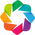

:Scatter   [Job_areas]   (2020,kmeans-segments)

In [ ]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

# Assuming women_predictions_df is your DataFrame containing the data

# Create the scatter plot using hvplot
scatter_plot = women_predictions_df.hvplot.scatter(
    x='Job_areas',
    y='2020',
    c="kmeans-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="2020",
    clim=(women_predictions_df["kmeans-segments"].min(), women_predictions_df["kmeans-segments"].max()),
    width=600,
    height=400,
    hover_cols=["kmeans-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot




<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
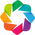

:Scatter   [Job_areas]   (2020,agglomerative-segments)

In [ ]:
hv.extension('bokeh')
# Create the scatter plot using hvplot
scatter_plot = women_predictions_df.hvplot.scatter(
    x='Job_areas',
    y='2020',
    c="agglomerative-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="2020",
    clim=(women_predictions_df["agglomerative-segments"].min(), women_predictions_df["agglomerative-segments"].max()),
    width=600,
    height=400,
    hover_cols=["agglomerative-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
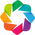

:Scatter   [Job_areas]   (2020,birch-segments)

In [ ]:
hv.extension('bokeh')
# Create the scatter plot using hvplot
scatter_plot = women_predictions_df.hvplot.scatter(
    x='Job_areas',
    y='2020',
    c="birch-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="2020",
    clim=(women_predictions_df["birch-segments"].min(), women_predictions_df["birch-segments"].max()),
    width=600,
    height=400,
    hover_cols=["birch-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

Part 6: Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, then add an additional column to the DataFrame that contains the tickers from the originalDataFrame.

In [ ]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=2)

In [ ]:
# Fit the df_stocks_scaled data to the PCA
wom_pca_data = pca.fit_transform(df_women_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
wom_pca_data[:5]

array([[-1.61189303,  0.18822198],
       [ 1.67278442, -0.3892062 ],
       [-0.20324828, -0.08163667],
       [-1.31179956,  0.21054987],
       [ 1.49657427, -0.27284117]])

In [ ]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.9194617 , 0.06400628])

In [ ]:
# Creating a DataFrame with the PCA data
df_women_pca = pd.DataFrame(wom_pca_data, columns=["PC1", "PC2"])
# Copy the tickers names from the original data
df_women_pca["Job_areas"] = df_women_scaled.index
# Set the Ticker column as index
df_women_pca = df_women_pca.set_index("Job_areas")
# Review the DataFrame
df_women_pca.head()

,PC1,PC2
Job_areas,,
Managers,-1.611893,0.188222
High-level professionals,1.672784,-0.389206
Mid-level professionals,-0.203248,-0.081637
"Employees engaged in preparation of information, documentation, accounting, financial and information services",-1.311800,0.210550
"Employees of the service sector, housing and utilities, trade and related activities",1.496574,-0.272841


In [ ]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=2)
# Fit the model for the df_stocks_pca DataFrame
model.fit(df_women_pca)
# Predict the model segments (clusters)
wom_clusters = model.predict(df_women_pca)
# Print the stock segments
print(wom_clusters)

[0 1 0 0 1 1 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Create a copy of the DataFrame and name it as df_stocks_pca_predictions
df_wom_pca_predictions = df_women_pca.copy()
# Create a new column in the DataFrame with the predicted clusters
df_wom_pca_predictions["Women_Clusters"] = wom_clusters
# Review the DataFrame
df_wom_pca_predictions.tail

<bound method NDFrame.tail of                                                          PC1       PC2  \
Job_areas                                                                
Managers                                           -1.611893  0.188222   
High-level professionals                            1.672784 -0.389206   
Mid-level professionals                            -0.203248 -0.081637   
Employees engaged in preparation of information... -1.311800  0.210550   
Employees of the service sector, housing and ut...  1.496574 -0.272841   
Skilled workers in agriculture, forestry, hunti...  2.445693  0.743930   
Skilled workers of large and small industrial e... -0.664434 -0.007855   
Machine, device and engine operators, locksmith... -1.590713  0.216082   
Unskilled workers                                  -0.232964 -0.607245   

                                                    Women_Clusters  
Job_areas                                                           
Managers         

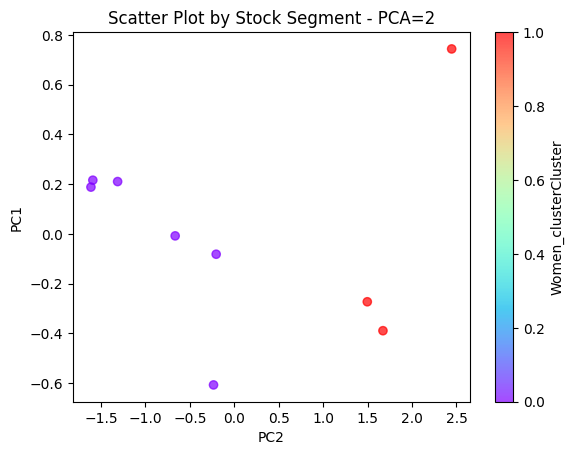

In [ ]:
plt.scatter(
    x=df_wom_pca_predictions["PC1"],
    y=df_wom_pca_predictions["PC2"],
    c=df_wom_pca_predictions["Women_Clusters"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.colorbar(label="Women_clusterCluster")

# Add the title
plt.title("Scatter Plot by Stock Segment - PCA=2")

# Show the plot
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
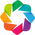

:Scatter   [PC1]   (PC2,Women_Clusters)

In [ ]:
hv.extension('bokeh')

# Assuming df_wom_pca_predictions is your DataFrame containing the PCA predictions

# Create the scatter plot using hvplot.scatter
plot = df_wom_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Women_Clusters",
    cmap='rainbow',
    colorbar=True,
    alpha=0.7,
    xlabel="PC2",
    ylabel="PC1",
    colorbar_label="Women Cluster",
    title="Scatter Plot by Stock Segment - PCA=2",
    width=600,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    clim=(df_wom_pca_predictions["Women_Clusters"].min(), df_wom_pca_predictions["Women_Clusters"].max())  # Set color limits
)
# Show the plot using hvplot.show
plot







<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
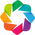

:Scatter   [PC1]   (PC2,Women_Clusters,Job_areas)

In [ ]:
hv.extension('bokeh')
# Create the scatter plot using hvplot.scatter
plot = df_wom_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Women_Clusters",
    cmap='rainbow',
    colorbar=True,
    alpha=0.7,
    xlabel="PC2",
    ylabel="PC1",
    colorbar_label="Women Cluster",
    title="Scatter Plot by Stock Segment - PCA=2",
    width=600,
    height=400,
    clim=(df_wom_pca_predictions["Women_Clusters"].min(), df_wom_pca_predictions["Women_Clusters"].max()),
    hover_cols=["Job_areas"]  # Adding hover text with "Job_areas" column
)

# Show the plot using hvplot.show
plot